In [92]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mpl_dates


# PLot Style
plt.style.use('bmh')

# Dataframe
df = pd.read_csv(r"D:\Python Course\Matpotlib Exerrcise pt1\csv\Cafe_Sales_Weather.csv")
df["Date"] = pd.to_datetime(df["Date"])

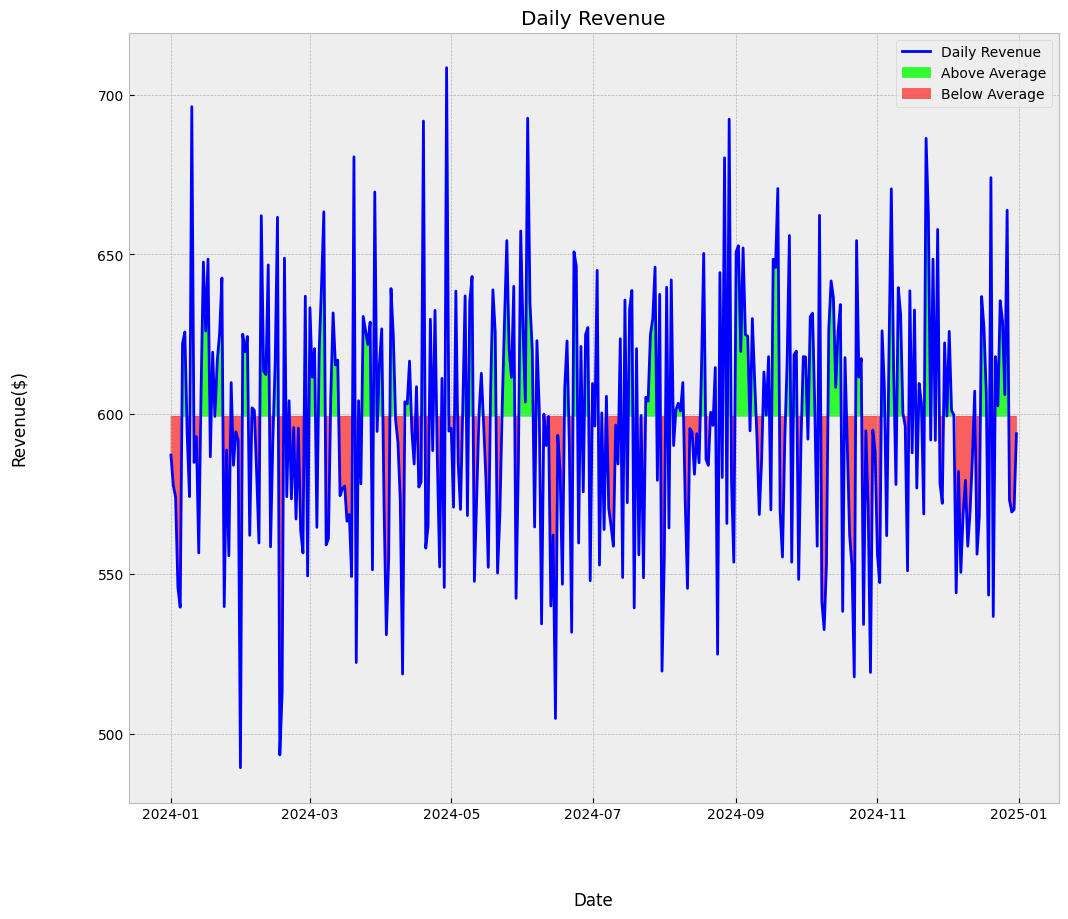

In [93]:
# Task 1
# 1. Line Plot (with filling area)
# Plot the daily total revenue over time using a line plot.
# Fill the area under the line to emphasize fluctuations.
# Highlight major dips with annotation.


plt.figure(figsize=(12, 10))

# Revenue
daily = df.set_index("Date")["Revenue"].resample("D").sum().reset_index()
median = daily["Revenue"].median()

plt.plot(daily["Date"], daily["Revenue"],label="Daily Revenue", color="blue")
plt.fill_between(daily["Date"], daily["Revenue"], median, where=(daily["Revenue"] > median), color="lime", alpha=0.8,label="Above Average")
plt.fill_between(daily["Date"], daily["Revenue"], median, where=(daily["Revenue"] < median), color="red", alpha=0.6, label="Below Average")

plt.title("Daily Revenue")
plt.xlabel("Date", labelpad=50)
plt.ylabel("Revenue($)", labelpad=50)
plt.legend()

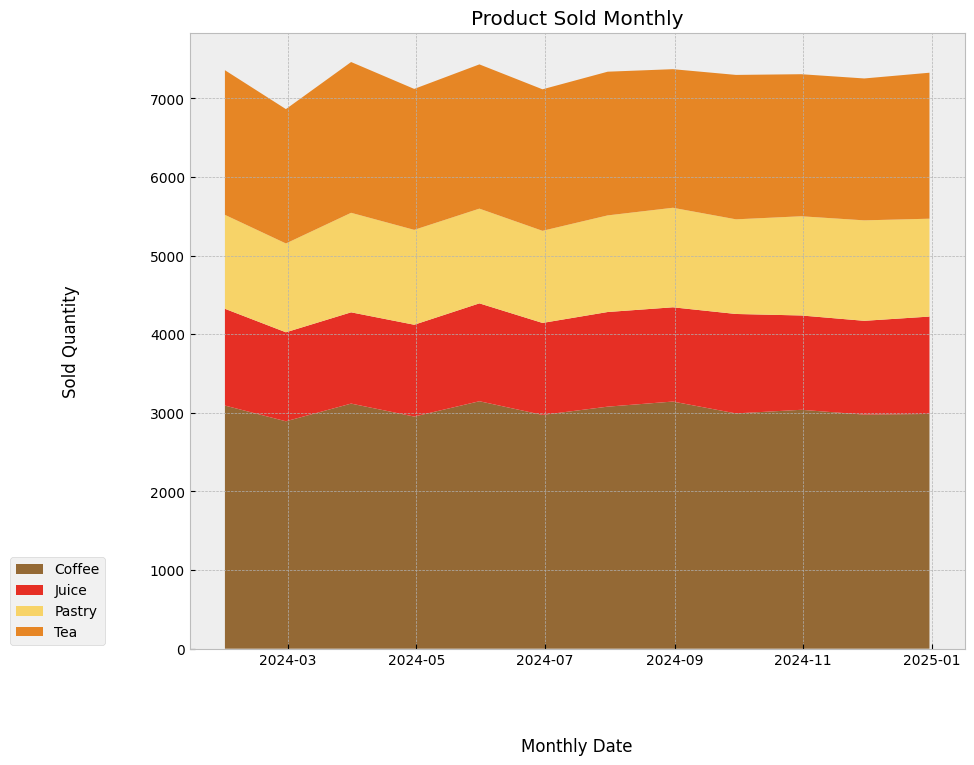

In [94]:
# Task 2
# 2. Stacked Bar Plot
# Create a stacked bar plot showing monthly sales (quantity) by product type.
# Use grouping and aggregation with pandas to prepare the data.


df1 = df.set_index("Date")

# Monthly Product Sold
product = df1.groupby("Product")["Quantity_Sold"].resample("ME").sum()

# Resahepe
products = product.unstack(level=0).fillna(0)

# Setup
labelss =["Coffee", "Juice", "Pastry", "Tea"]
colorss = ["#946935", "#e62f25", "#f7d368", "#e68625"]

plt.figure(figsize=(10, 8))
plt.stackplot(products.index,products["Coffee"], products["Juice"],products["Pastry"],products["Tea"], labels=labelss, colors=colorss)
plt.title("Product Sold Monthly")
plt.xlabel("Monthly Date", labelpad=50)
plt.ylabel("Sold Quantity", labelpad=50)
plt.legend(bbox_to_anchor=(-0.1, 0.16))


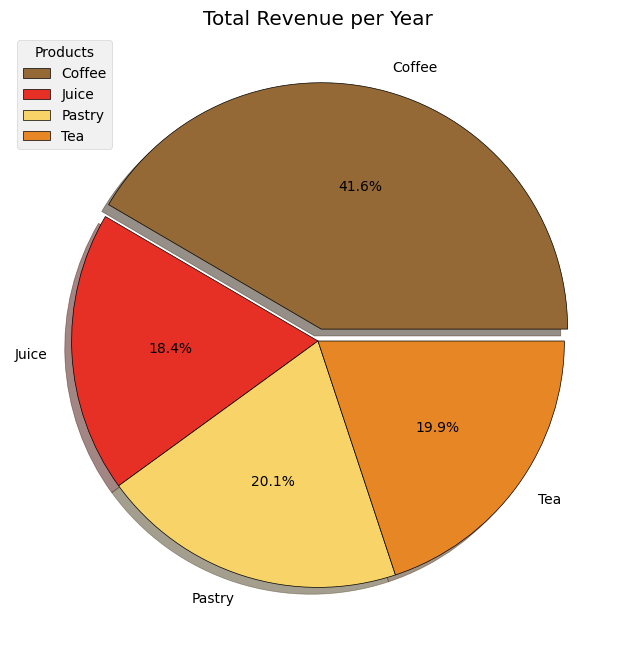

In [95]:
# Task 3
#  3. Pie Chart
# Show the proportion of total revenue per product across the year.

# Product Revenue Annual
product1 = df1.groupby("Product")["Revenue"].resample("YE").sum()
df1.head(5)
labels1 = product1.index.get_level_values("Product")
explodes = [0.05, 0, 0, 0]

plt.figure(figsize=(10, 8))
plt.pie(product1.values, labels=labels1, wedgeprops={'edgecolor':'black'}, autopct="%1.1f%%", shadow=True, colors=colorss, explode=explodes)


plt.title("Total Revenue per Year", loc="center")
plt.legend(
            loc="center left",
            bbox_to_anchor=(-0.0, 0.9),
            title='Products'
           )



Text(0, 0.5, 'Frequency')

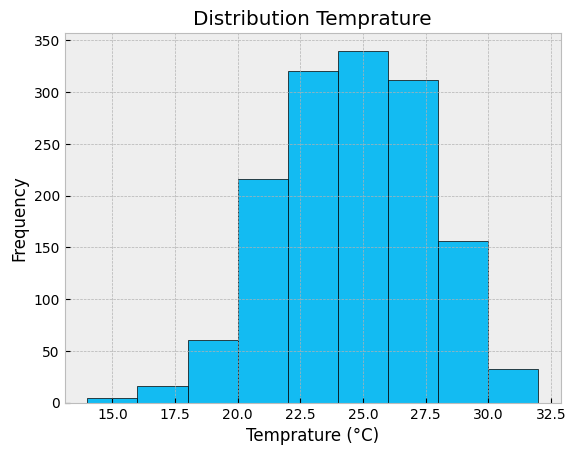

In [96]:
# Task 4
# 4. Histogram
# Create a histogram showing the distribution of temperature values.
# Use bins of 2 degrees.

df.head(5)

# Get Temp
temps = df["Temperature"]
tempMin = round(temps.min())
tempMax = round(temps.max())

plt.hist(temps, bins=range(tempMin, tempMax, 2), edgecolor='black', color='#13bbf2')

plt.title("Distribution Temprature")
plt.xlabel("Temprature (°C)")
plt.ylabel("Frequency")

C:\Users\Diandra\AppData\Local\Temp\ipykernel_15876\2200753851.py:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(temp, rev, c=colors, cmap="cool", linewidths=0.5, alpha=0.9, edgecolors='black')


Text(0, 0.5, 'Revenue ($)')

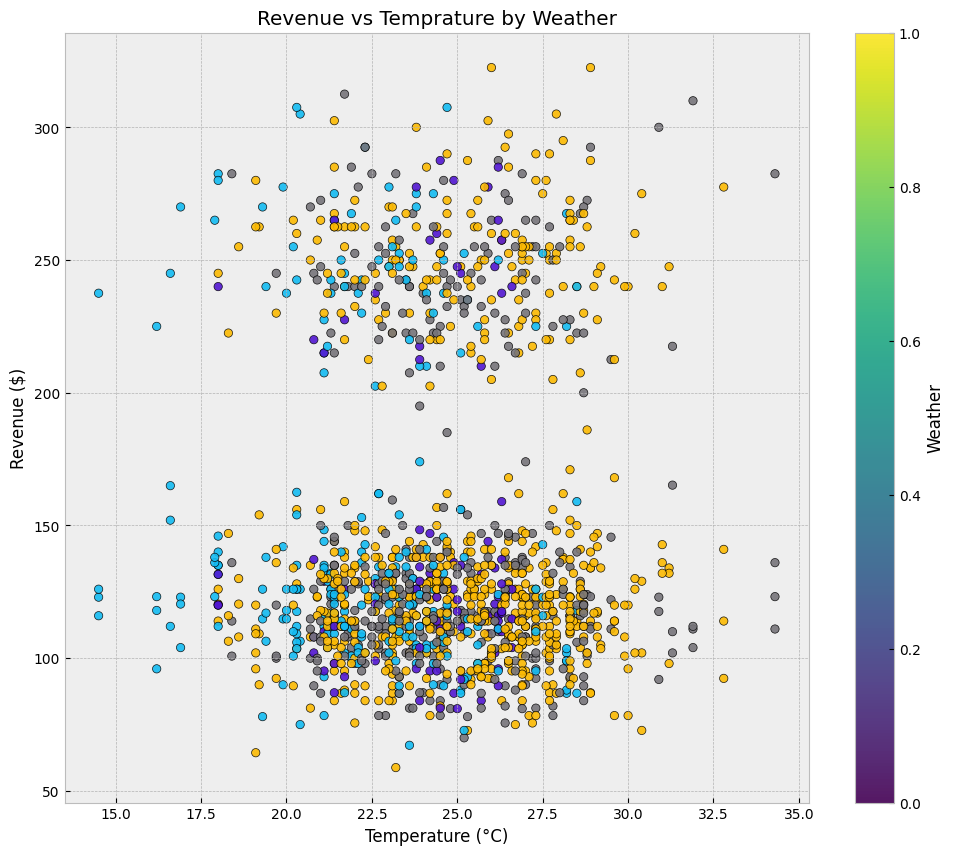

In [97]:
# Task 5
# 5. Scatter Plot
# Make a scatter plot of temperature vs revenue.
# Color the dots based on weather condition (e.g., sunny, rainy, cloudy).

df.head(5)

# Get Value
temp = df["Temperature"]
rev = df["Revenue"]
weather = df["Weather"]

weatherCol = {
    'Sunny':'#fcba03',
    'Cloudy':'#76747a',
    'Rainy':'#13bbf2',
    'Stormy':'#5217d1'
}

colors = weather.map(weatherCol)


plt.figure(figsize=( 12,10))

plt.scatter(temp, rev, c=colors, cmap="cool", linewidths=0.5, alpha=0.9, edgecolors='black')
cbar = plt.colorbar()
cbar.set_label("Weather")

plt.title("Revenue vs Temprature by Weather")
plt.xlabel("Temperature (°C)")
plt.ylabel("Revenue ($)")

Text(0, 0.5, 'Revenue ($)')

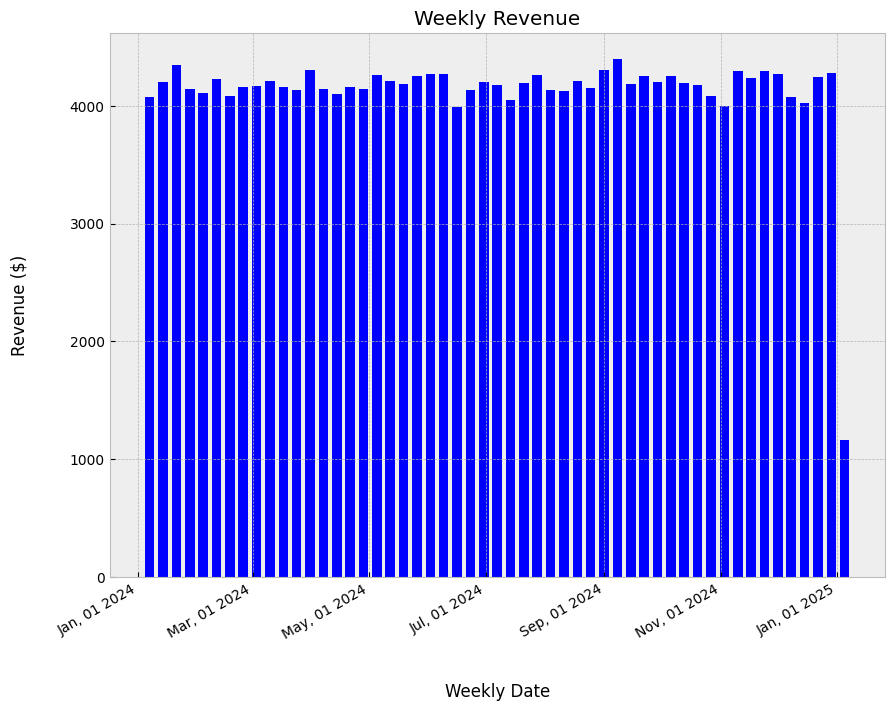

In [101]:
# Task 6
# 6. Bar Plot
# Show average revenue per day of the week (e.g., Monday to Sunday).
# Add custom labels and rotate x-axis ticks.


# Get weekly revenue
data = df1["Revenue"].resample("W").sum()
weekly = data.index
revenue = data.values

plt.figure(figsize=(10, 8))
plt.bar(weekly, revenue, width=5, color='blue')

# Date Formatting
plt.gcf().autofmt_xdate()
dateFormat = mpl_dates.DateFormatter("%b, %d %Y")
plt.gca().xaxis.set_major_formatter(dateFormat)

plt.title("Weekly Revenue")
plt.xlabel("Weekly Date", labelpad=30)
plt.ylabel("Revenue ($)", labelpad=30)


C:\Users\Diandra\AppData\Local\Temp\ipykernel_15876\1118788730.py:10: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use plot instead.
  plt.plot_date(dates, rainfall, linestyle="solid")


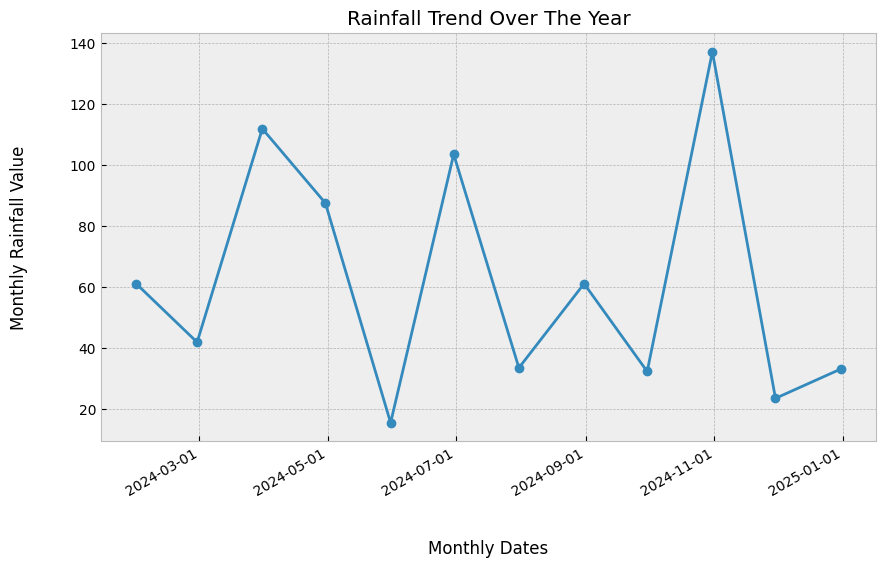

In [118]:
# Task 7
#  7. Date & Time Plotting
# Plot rainfall (Rain_mm) over the year.
# Add gridlines and date formatting (month-based).

df.head(5)

data = df1["Rain_mm"].resample("ME").sum()
dates = data.index
rainfall = data.values

plt.figure(figsize=(10, 6))
plt.plot_date(dates, rainfall, linestyle="solid")
plt.title("Rainfall Trend Over The Year")
plt.xlabel("Monthly Dates", labelpad=30)
plt.ylabel("Monthly Rainfall Value", labelpad=30)

plt.gcf().autofmt_xdate()
dateFormat1 = mpl_dates.AutoDateFormatter("%b, %d %Y")
plt.gca().xaxis.set_major_formatter(dateFormat1)